## Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

Instructions
1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

### 1. Load the dataset and explore the variables.

In [206]:
data = pd.read_csv('./customer_churn.csv')

In [207]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [208]:
data.shape

(7043, 21)

In [209]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [210]:
data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

### 3. Extract the target variable.

In [211]:
data.Churn == 'Yes'
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [212]:
y = (data.Churn == 'Yes')*1
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### 4. Extract the independent variables and scale them.

In [213]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
X.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [214]:
X.shape

(7043, 3)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:>

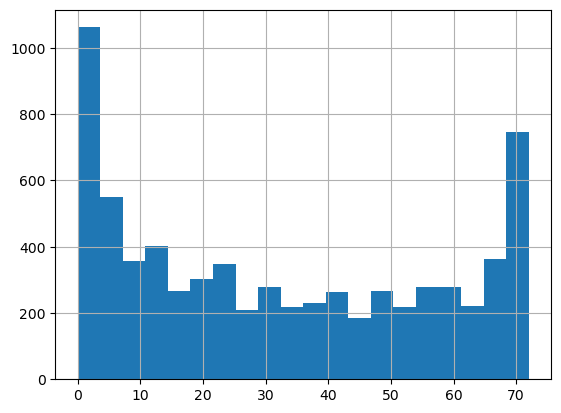

In [215]:
display(X['tenure'].value_counts())
%matplotlib inline
X['tenure'].hist(bins=20)


0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:>

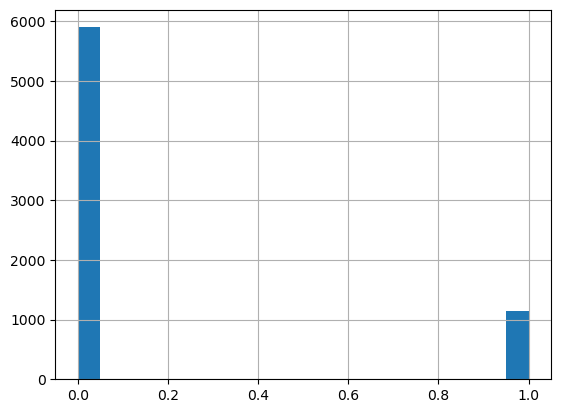

In [216]:
display(X['SeniorCitizen'].value_counts())
%matplotlib inline
X['SeniorCitizen'].hist(bins=20)

In [217]:
# Since we can see that Senior Citizen has only the values 0 and 1 we change it to boolean.
X['SeniorCitizen']=X['SeniorCitizen'].astype('bool')

/var/folders/v7/ctgngqdj6_j2cgx35nnddp8r0000gn/T/ipykernel_3728/2272985606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SeniorCitizen']=X['SeniorCitizen'].astype('bool')


20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

<AxesSubplot:>

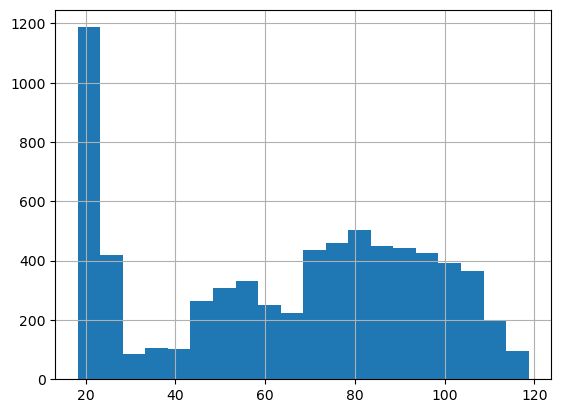

In [218]:
display(X['MonthlyCharges'].value_counts())
%matplotlib inline
X['MonthlyCharges'].hist(bins=20)

In [219]:
X.dtypes

tenure              int64
SeniorCitizen        bool
MonthlyCharges    float64
dtype: object

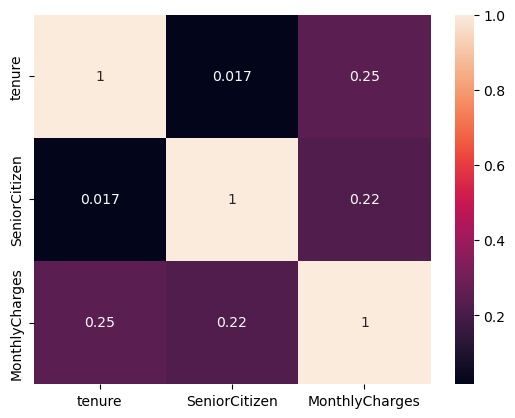

In [220]:
# Assumption: no colinearity, confirmed by the correlation matrix/heatmap
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### train-test-split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(5282, 3)

(1761, 3)

(5282,)

(1761,)

#### Standard transformation of numerical data (all features are numeric, so no need for a _num and _cat split)

In [222]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)

In [223]:
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [224]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: Churn, dtype: int64

In [225]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True)

### 5. Build the logistic regression model.

In [226]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [227]:
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]])

In [228]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

# predicted         |    Negative   | Positive      | 
# ----------------------------------------------------
# Actual  Negative  | True Negative |False Positive |
# ----------------------------------------------------
#         Positive  |False Negative | True Positive | 

#accuracy = #True positives + #True Negatives / #total Predictions
#precision = #True positives /#True Positives + #False Positives
#recall = #True positives /#True Positives + #False Negatives --> usually for "health"-issues is better, but if test is very expensive or a lot
#   of stress is involved, we might go for the precision one.

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


### 6. Evaluate the model.

Our LR-Model has a score/an accuracy $=  \frac{\textrm{Churn correctly predicted + No Churn correctly predicted}}{\textrm{total Predictions}} =$ 0.78, which is not to bad at first sight. 

Evaluating the precision $=  \frac{\textrm{Churn correctly predicted }}{\textrm{Churn correctly predicted + Churn incorrectly predicted}} =$ 0.61. This means that of the correctly predicted churn, 61% are truly positive. all right as well.

Evaluating the recall $=  \frac{\textrm{Churn correctly predicted }}{\textrm{Churn correctly predicted + No Churn incorrectly predicted}} =$ 0.4557. This means that out of the predicted data we only predict 46% of the positives. So we miss 55%!

The F1-value $=  2*\frac{\textrm{Precision}*\textrm{Recall}}{\textrm{Precision}+\textrm{Recall}} =$ 0.522. is all right, since our best-case (a precision and a recall of 1) is a F1-value of 1, there is still some way to go.

### 7. Even a simple model will give us more than 70% accuracy. Why?

This is due to the high imbalance of the data: 
We have 5174 = no churn-values and 1869 = churn-values, our churn-values make up only 26.5% of the total dataset.

In [229]:
count_classes = y.value_counts()
count_classes

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

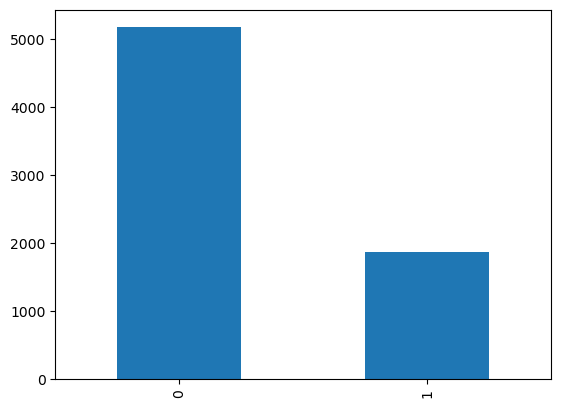

In [230]:
count_classes.plot(kind = 'bar')

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) 
SMOTE is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [231]:
# by default, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [232]:
X_train_SMOTE.shape

(7752, 3)

In [233]:
LR_SMOTE = LogisticRegression(random_state=0, solver='lbfgs')
LR_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
predictions_SMOTE = LR_SMOTE.predict(X_test_scaled)
LR_SMOTE.score(X_test_scaled, y_test)

0.7194775695627484

In [234]:

print("precision: ",precision_score(y_test,predictions_SMOTE))
print("recall: ",recall_score(y_test,predictions_SMOTE))
print("f1: ",f1_score(y_test,predictions_SMOTE))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [235]:
print("Confusion Matrix: Imbalanced Data: ")
print(confusion_matrix(y_test,pred))
print("Confusion Matrix: SMOTE-Improved Data: ")
print(confusion_matrix(y_test,predictions_SMOTE))

# predicted         |    Negative   | Positive      | 
# ----------------------------------------------------
# Actual  Negative  | True Negative |False Positive |
# ----------------------------------------------------
#         Positive  |False Negative | True Positive | 

Confusion Matrix: Imbalanced Data: 
[[1164  134]
 [ 252  211]]
Confusion Matrix: SMOTE-Improved Data: 
[[935 363]
 [131 332]]


In [237]:
from tabulate import tabulate
print(tabulate([['score', LR.score(X_test_scaled, y_test), LR_SMOTE.score(X_test_scaled, y_test)],['precision', precision_score(y_test,pred),precision_score(y_test,predictions_SMOTE)], ['recall', recall_score(y_test,pred),recall_score(y_test,predictions_SMOTE) ], ['f1',f1_score(y_test,pred), f1_score(y_test,predictions_SMOTE) ]], headers=['Imbalanced Data', 'SMOTE-Improved Data']))

             Imbalanced Data    SMOTE-Improved Data
---------  -----------------  ---------------------
score               0.780806               0.719478
precision           0.611594               0.477698
recall              0.455724               0.717063
f1                  0.522277               0.573402


After adding new points in the data with the SMOTE-technique, we can see that our score and our precision of the predictions have worsened, but our recall (our amount of Churn correctly predicted - Data) has considerably improved. The f1-value that is the trade-off value between recall and precision has improved as well. In conclusion we can say that through the usage of the SMOTE-technique we could improve our model.